In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score, accuracy_score
)
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,matthews_corrcoef,log_loss,precision_recall_curve,mean_absolute_error, mean_squared_error, r2_score
)

In [2]:
# Loading the Excel file and selecting the relevant sheet
file_path = 'Bitcoin-Historical-Data.xlsx'  # Replace with your file's path
sheet_name = "Bitcoin Historical Data (1)"
bitcoin_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Using pandas to display an overview of the dataset
print("### Data Information ###")
bitcoin_data.info()  # Overview of data types and non-null counts

# Generating descriptive statistics as a DataFrame
description_df = bitcoin_data.describe()

# Displaying the description DataFrame
print("\n### Data Description as DataFrame ###")

# Alternatively, to render it nicely in a Jupyter Notebook, use:
description_df

### Data Information ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        2648 non-null   object        
 1   DATE                        2648 non-null   datetime64[ns]
 2   Price                       2648 non-null   float64       
 3   Open                        2648 non-null   float64       
 4   High                        2648 non-null   float64       
 5   Low                         2648 non-null   float64       
 6   Vol.                        2648 non-null   object        
 7   Change %                    2648 non-null   float64       
 8   SN&P Adjusted               2648 non-null   float64       
 9   DXY Adjusted                2648 non-null   float64       
 10  GOLD Adjusted               2648 non-null   float64       
 11  ETH Price                   264

,Price,Open,High,Low,Change %,SN&P Adjusted,DXY Adjusted,GOLD Adjusted,ETH Price,OIL Price Adjusted,Days from the last halving,BTC_Hashprice,Crypto Volatility Index,Target Value
count,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,1828.000000,1845.000000,2648.000000
mean,20901.424282,20877.398716,21392.479003,20323.478210,0.002369,3480.044532,97.470220,1630.579018,1194.447572,65.314845,755.466767,0.000009,78.090188,0.301360
std,17572.649566,17556.214865,17991.385482,17078.564132,0.038534,798.124795,5.275653,291.668473,1150.976099,18.314031,388.774747,0.000009,21.483822,0.458935
min,893.800000,892.900000,905.700000,841.500000,-0.391800,2191.900000,88.170000,1174.160000,10.460000,10.010000,1.000000,0.000002,34.497800,0.000000
25%,7118.375000,7114.825000,7329.950000,6886.950000,-0.014000,2760.200000,93.340250,1305.457500,220.437500,52.750000,428.000000,0.000003,62.690100,0.000000
50%,12345.850000,12266.800000,13053.850000,11719.250000,0.001300,3353.600000,96.491000,1727.485000,670.665000,64.340000,759.000000,0.000006,75.580000,0.000000
75%,32099.525000,32033.675000,33176.125000,30504.025000,0.019100,4185.050000,101.796000,1870.490000,1868.935000,76.680000,1090.000000,0.000009,91.935100,1.000000
max,73066.300000,73066.700000,73740.900000,71338.400000,0.255600,5245.800000,114.047000,2390.450000,4808.380000,123.700000,1439.000000,0.000042,170.550500,1.000000


In [3]:
# Checking for missing values in the dataset
missing_values = bitcoin_data.isnull().sum()

# Filtering columns with more than 0 missing values
missing_values_filtered = missing_values[missing_values > 0]

# Converting the result to a DataFrame for better display
missing_values_df = missing_values_filtered.to_frame(name="Missing Values")
missing_values_df.index.name = "Column"

# Displaying the DataFrame
print("### Columns with Missing Values ###")
print(missing_values_df)

### Columns with Missing Values ###
                         Missing Values
Column                                 
BTC_Hashprice                       820
Crypto Volatility Index             803


In [4]:
def convert_to_numeric(value):
    """
    Converts strings like '1.2K', '3M', '4B' into numeric values.
    """
    if isinstance(value, str):
        if value.endswith('K'):
            return float(value[:-1]) * 1_000
        elif value.endswith('M'):
            return float(value[:-1]) * 1_000_000
        elif value.endswith('B'):
            return float(value[:-1]) * 1_000_000_000
        else:
            return float(value.replace(',', ''))  # Removes commas if present
    return value

# Specifying columns to convert
columns_to_convert = ['Vol.', 'ETH Vol.']  # Replace with your actual column names containing 'K', 'M', 'B'

# Applying the function to the specified columns
for column in columns_to_convert:
    bitcoin_data[column] = bitcoin_data[column].apply(convert_to_numeric)

# Verifying the conversion
print("### Converted Columns Preview ###")
print(bitcoin_data[columns_to_convert].head())

### Converted Columns Preview ###
       Vol.  ETH Vol.
0   45170.0  276660.0
1   49330.0  256050.0
2  150340.0  645650.0
3   97380.0  423990.0
4  118920.0  524880.0


In [5]:
# Creating the new DataFrame
updated_bitcoin_data = bitcoin_data.copy()
updated_bitcoin_data

,Date,DATE,Price,Open,High,Low,Vol.,Change %,SN&P Adjusted,DXY Adjusted,GOLD Adjusted,ETH Price,ETH Vol.,OIL Price Adjusted,Days from the last halving,BTC_Hashprice,Crypto Volatility Index,Target Value
0,04/21/2024,2024-04-21,64902.8,64942.1,65680.6,64618.4,45170.0,-0.0009,4953.56,105.984,2390.45,3169.62,276660.0,83.14,2,0.000003,75.1890,0
1,04/20/2024,2024-04-20,64961.1,63817.6,65375.6,63131.7,49330.0,0.0182,4953.56,105.984,2390.45,3156.63,256050.0,83.14,1,0.000002,74.3407,0
2,04/19/2024,2024-04-19,63799.1,63480.5,65441.2,59693.3,150340.0,0.0050,4953.56,105.984,2390.45,3056.23,645650.0,83.14,1439,0.000002,73.6438,0
3,04/18/2024,2024-04-18,63481.4,61278.9,64092.4,60822.3,97380.0,0.0359,5001.89,105.982,2378.25,3064.48,423990.0,82.73,1438,0.000002,72.4399,1
4,04/17/2024,2024-04-17,61278.9,63802.3,64451.5,59820.8,118920.0,-0.0396,5007.25,105.764,2360.81,2985.82,524880.0,82.69,1437,0.000002,74.0805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,01/25/2017,2017-01-25,894.4,893.8,905.7,883.6,37900.0,0.0007,2288.90,100.252,1200.31,10.48,26190.0,52.75,200,NaN,NaN,0
2644,01/24/2017,2017-01-24,893.8,921.5,925.6,889.2,58870.0,-0.0301,2266.70,100.058,1208.81,10.50,105210.0,53.18,199,NaN,NaN,1
2645,01/23/2017,2017-01-23,921.5,918.8,928.0,910.8,32740.0,0.0029,2257.00,100.125,1217.48,10.77,54390.0,52.75,198,NaN,NaN,0
2646,01/22/2017,2017-01-22,918.8,919.8,938.4,888.6,47930.0,-0.0011,2257.00,100.125,1217.48,10.64,140660.0,52.75,197,NaN,NaN,0


In [6]:
# Optimized calculation using dynamic window and filtering
def optimized_support_resistance(data, window=10, threshold=0.02):
    updated_bitcoin_data['support_level'] = updated_bitcoin_data['Low'].rolling(window=window).min()
    updated_bitcoin_data['resistance_level'] = updated_bitcoin_data['High'].rolling(window=window).max()
    
    # Filter insignificant levels
    updated_bitcoin_data['filtered_support'] = updated_bitcoin_data['support_level'].where(
        updated_bitcoin_data['Low'] <= updated_bitcoin_data['support_level'] * (1 - threshold))
    updated_bitcoin_data['filtered_resistance'] = updated_bitcoin_data['resistance_level'].where(
        updated_bitcoin_data['High'] >= updated_bitcoin_data['resistance_level'] * (1 + threshold))
    
    return updated_bitcoin_data[['support_level', 'resistance_level', 'filtered_support', 'filtered_resistance']]


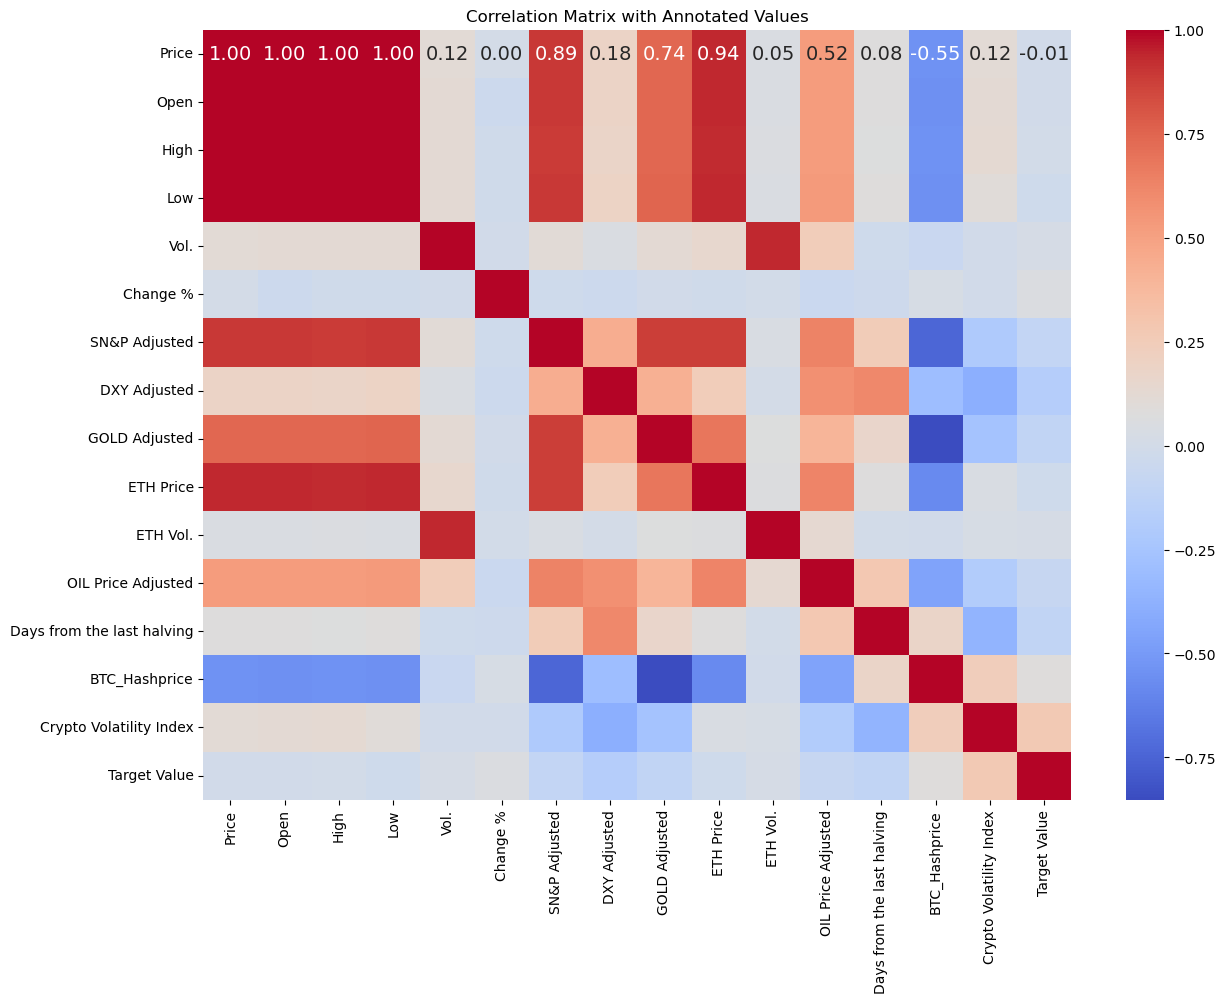

In [7]:
# 3.1 Correlation Matrix
# Select only numeric columns for correlation
# Select only numeric columns for correlation
numeric_data = updated_bitcoin_data.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(14, 10))  # Increase figure size for better clarity
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 14})
plt.title('Correlation Matrix with Annotated Values')
plt.show()

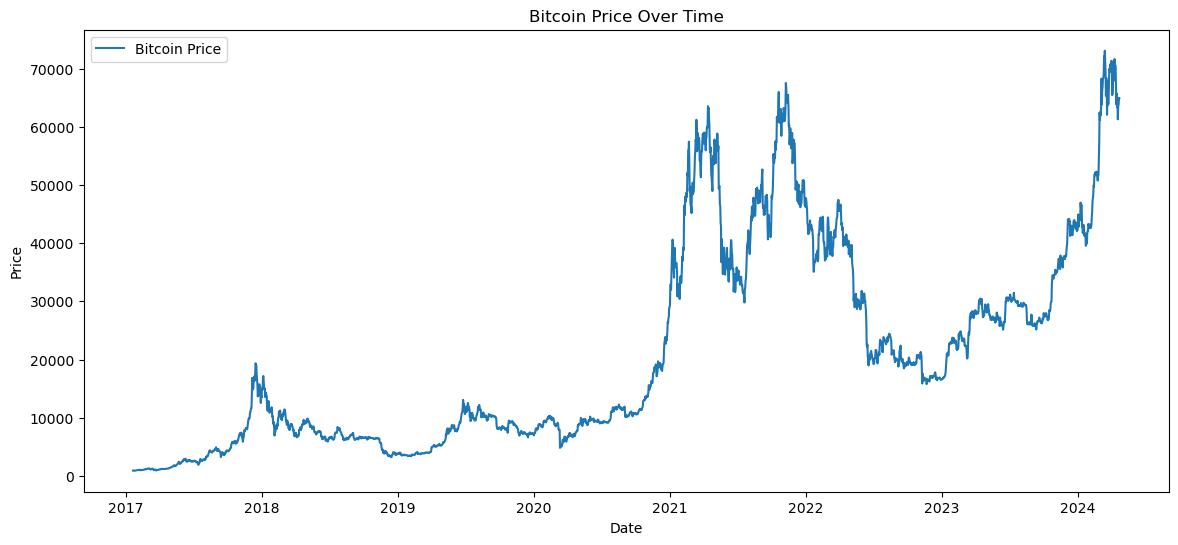

In [8]:
updated_bitcoin_data['DATE'] = pd.to_datetime(updated_bitcoin_data['DATE'])
plt.figure(figsize=(14, 6))
plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['Price'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.show()

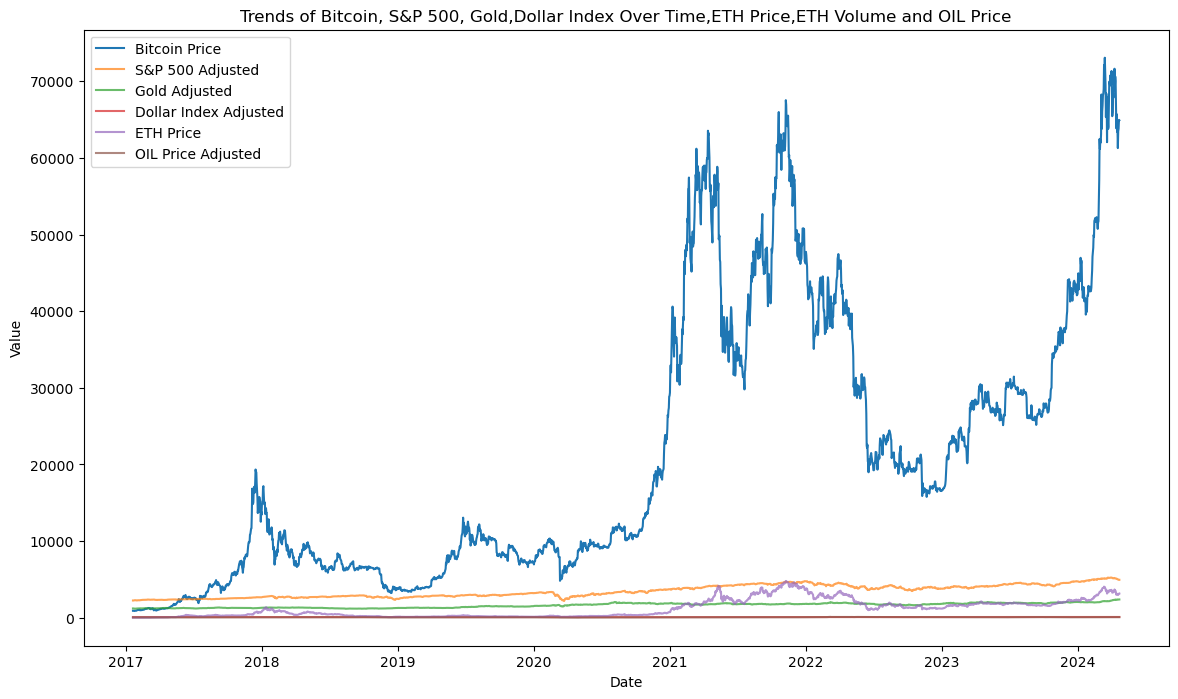

In [9]:
plt.figure(figsize=(14, 8))
plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['Price'], label='Bitcoin Price')
plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['SN&P Adjusted'], label='S&P 500 Adjusted', alpha=0.7)
plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['GOLD Adjusted'], label='Gold Adjusted', alpha=0.7)
plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['DXY Adjusted'], label='Dollar Index Adjusted', alpha=0.7)
plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['ETH Price'], label='ETH Price', alpha=0.7)
#plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['ETH Vol.'], label='ETH Volume', alpha=0.7)
plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['OIL Price Adjusted'], label='OIL Price Adjusted', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trends of Bitcoin, S&P 500, Gold,Dollar Index Over Time,ETH Price,ETH Volume and OIL Price')
plt.legend()
plt.show()

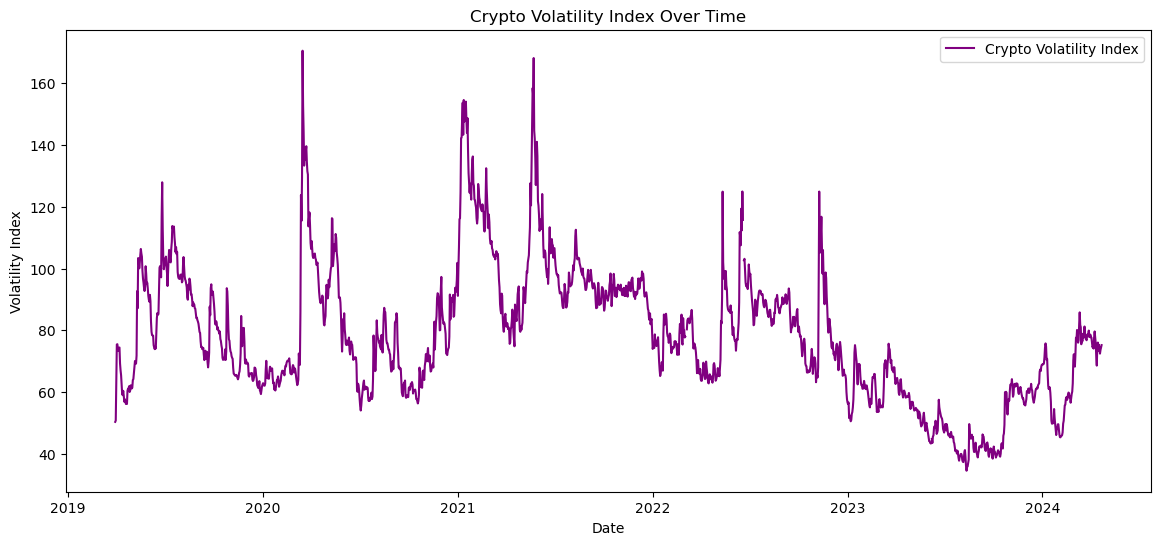

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(updated_bitcoin_data['DATE'], updated_bitcoin_data['Crypto Volatility Index'], color='purple', label='Crypto Volatility Index')
plt.xlabel('Date')
plt.ylabel('Volatility Index')
plt.title('Crypto Volatility Index Over Time')
plt.legend()
plt.show()

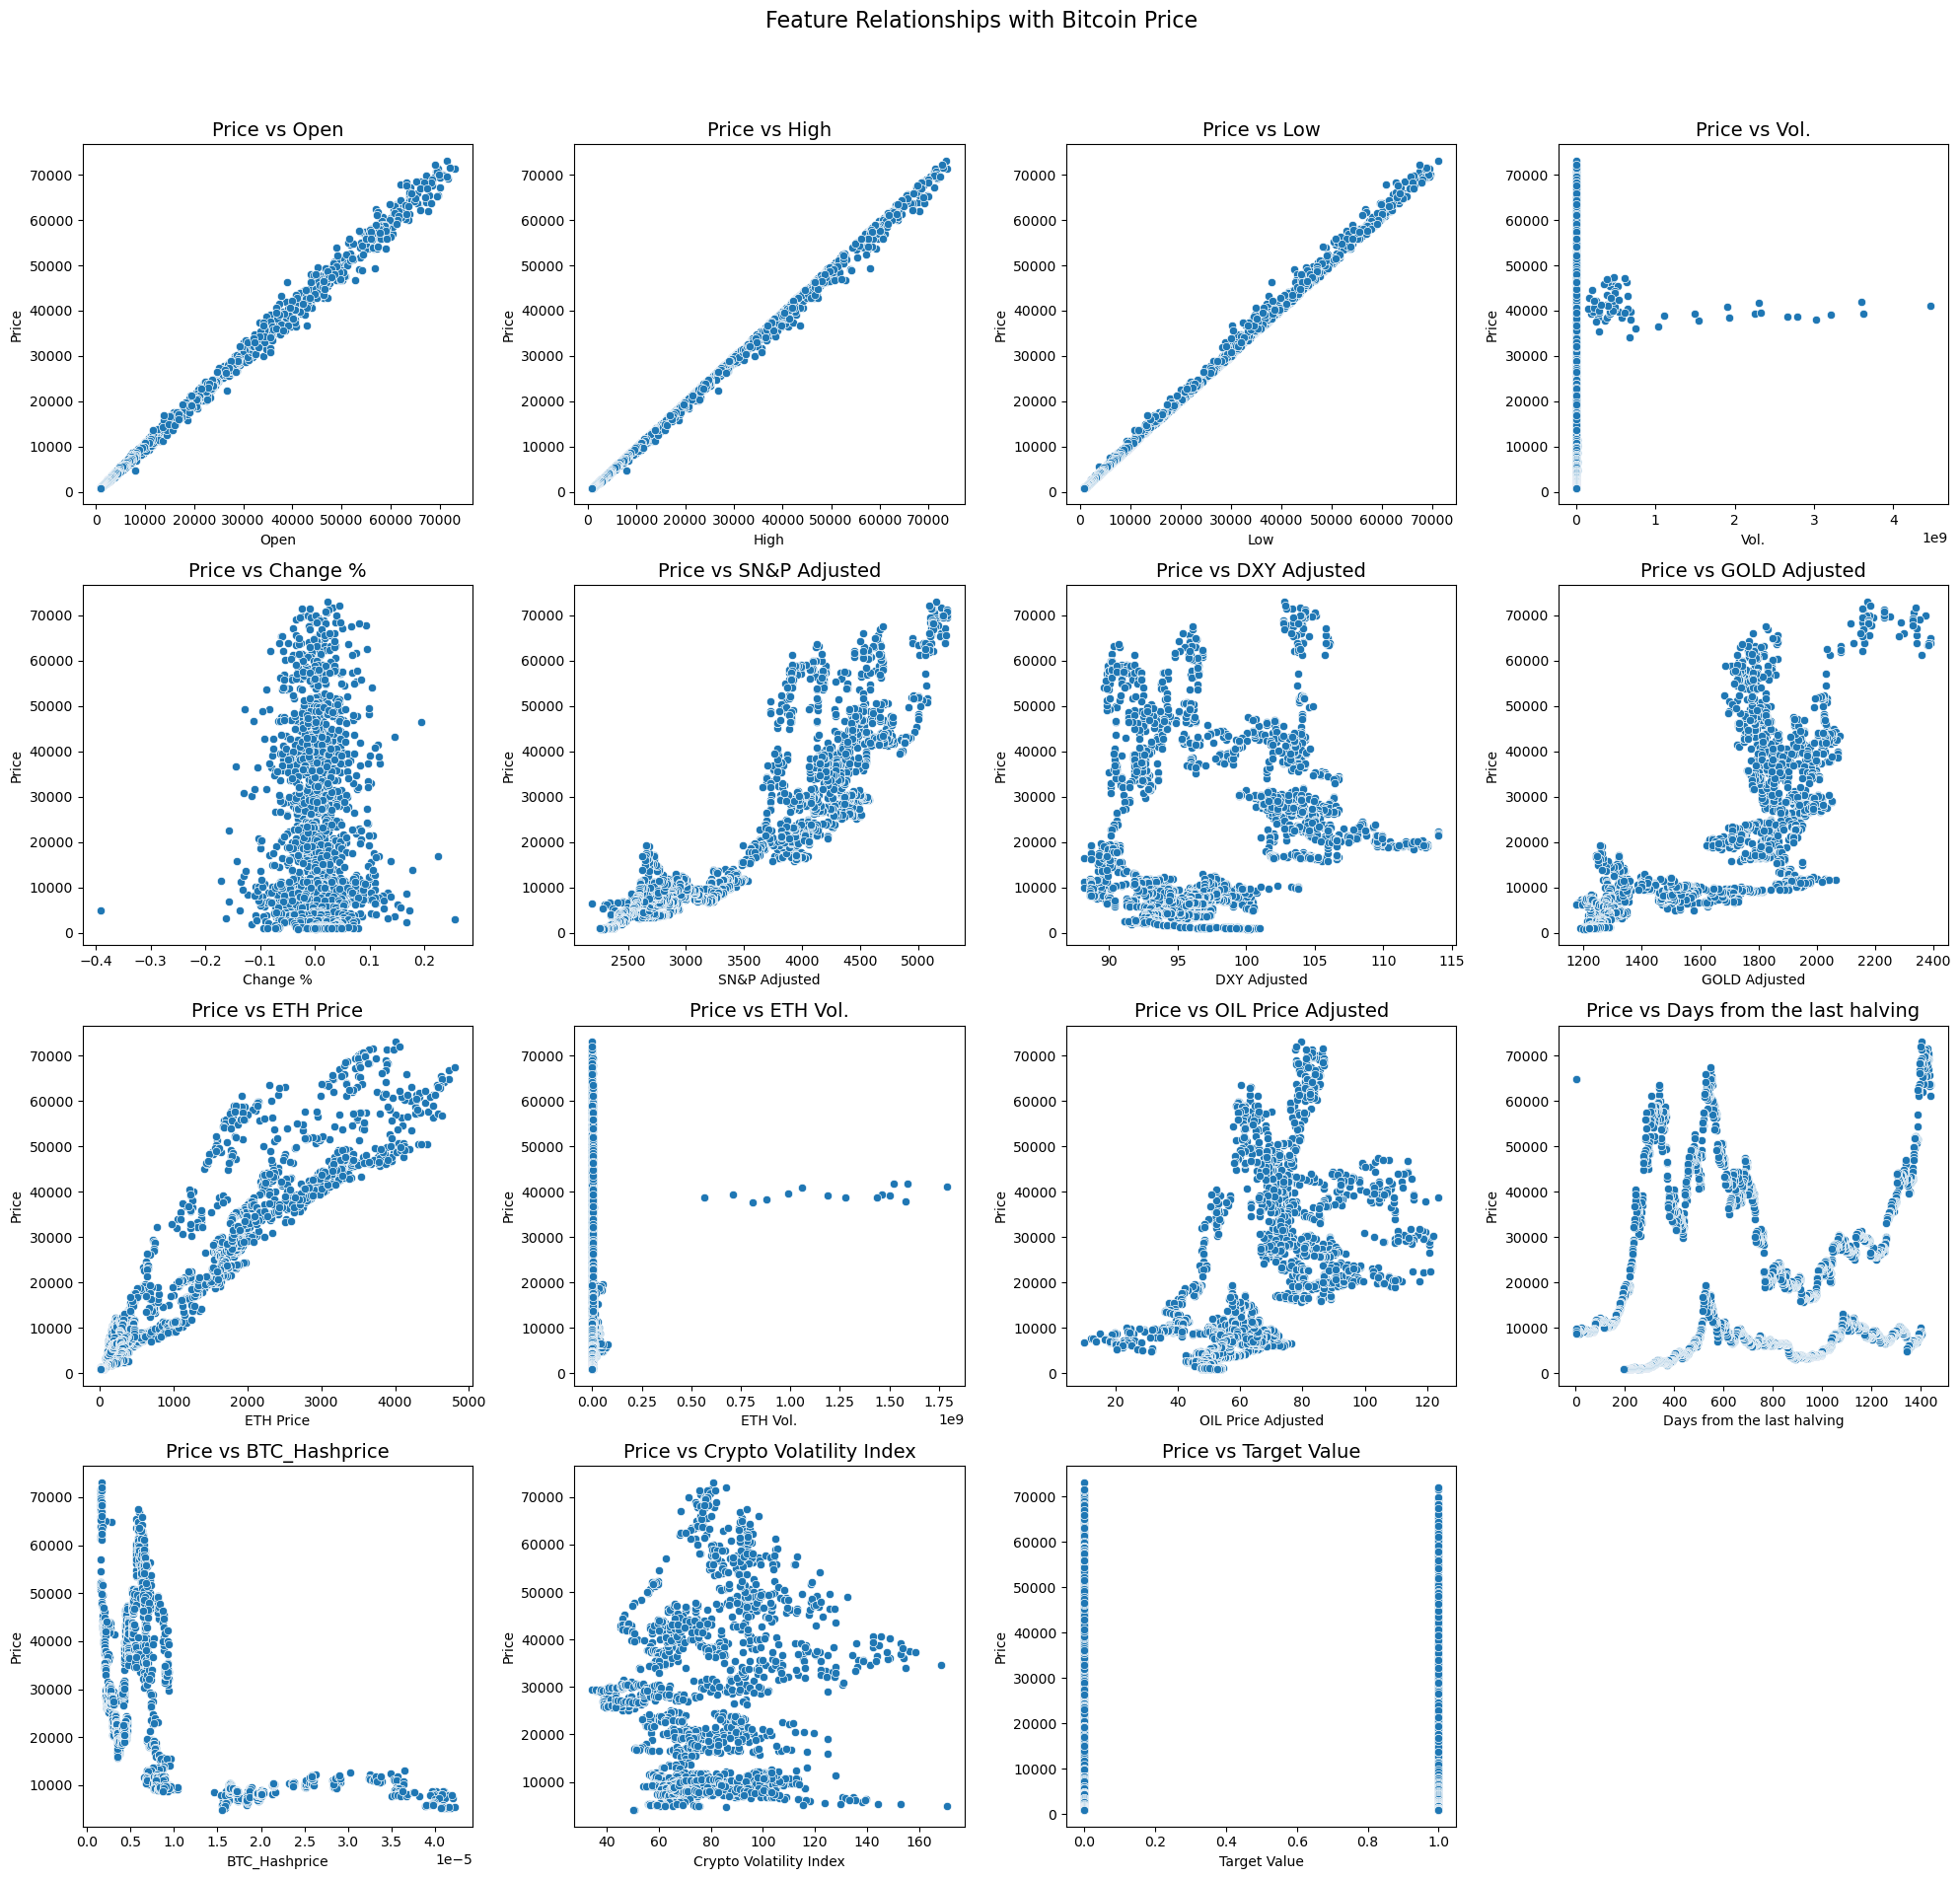

In [11]:
# Updating the feature list to include all numeric features except 'Price' itself
all_numeric_features = updated_bitcoin_data.select_dtypes(include=[np.number]).columns
features_to_scatter = [feature for feature in all_numeric_features if feature != 'Price']

# Setting up the figure and subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust grid size for the number of features
fig.suptitle('Feature Relationships with Bitcoin Price', fontsize=16)

# Looping through the features to create scatter plots
for i, feature in enumerate(features_to_scatter):
    row, col = divmod(i, 4)  # Determine subplot position
    sns.scatterplot(x=updated_bitcoin_data[feature], y=updated_bitcoin_data['Price'], ax=axes[row, col])
    axes[row, col].set_title(f'Price vs {feature}', fontsize=14)

# Hide any unused subplots if the grid is larger than needed
for i in range(len(features_to_scatter), 4 * 4):
    row, col = divmod(i, 4)
    axes[row, col].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

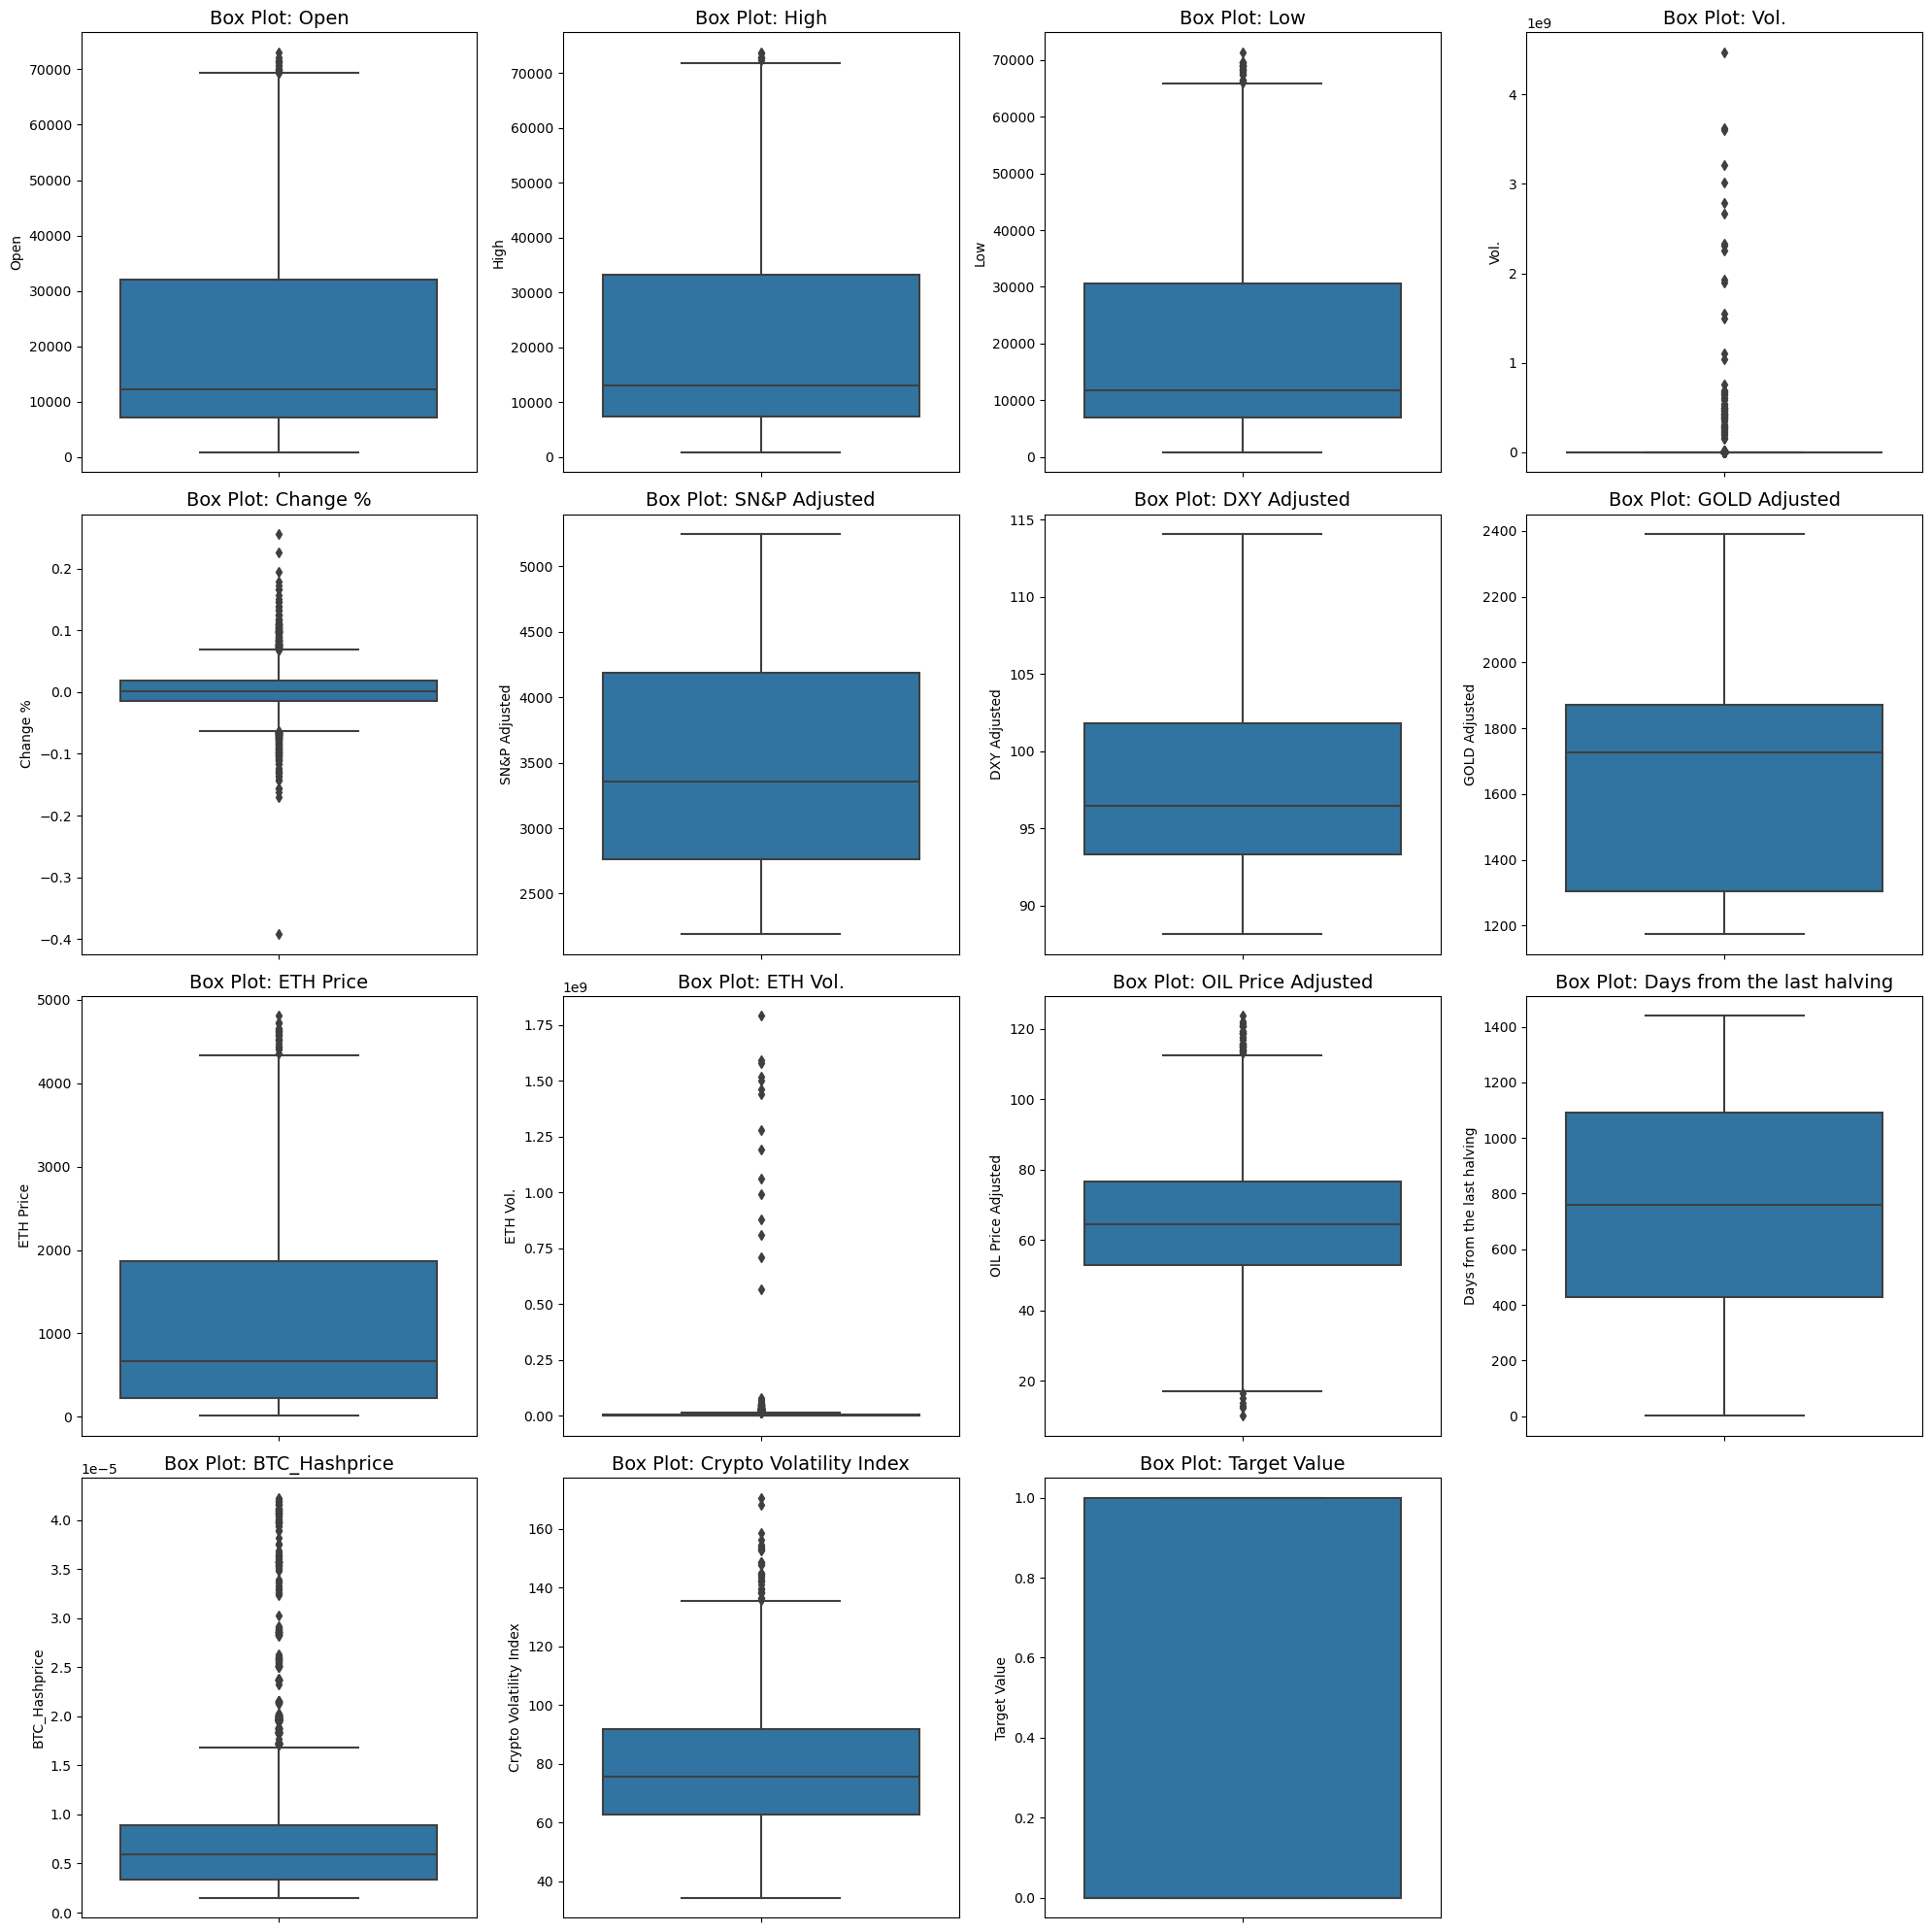

In [12]:
# Setting up the figure for box plots
num_features = updated_bitcoin_data.select_dtypes(include=[np.number]).columns
num_features = [feature for feature in num_features if feature != 'Price']  # Exclude 'Price' for clarity

# Determine grid size
num_plots = len(num_features)
rows = (num_plots // 4) + (1 if num_plots % 4 != 0 else 0)  # Adjust rows based on features

# Create subplots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot box plots for each feature
for i, feature in enumerate(num_features):
    sns.boxplot(data=updated_bitcoin_data, y=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot: {feature}', fontsize=14)

# Hide unused subplots if the grid is larger than needed
for i in range(len(num_features), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
# Redefine features and target
features = [
    'ETH Vol.', 'Days from the last halving', 'Crypto Volatility Index',
    'GOLD Adjusted', 'OIL Price Adjusted', 'ETH Price', 'Low', 'High', 'Price', 
    'Open', 'Vol.', 'Change %', 'SN&P Adjusted', 'DXY Adjusted', 'BTC_Hashprice'
]

# Extract features and target
X = updated_bitcoin_data[features]
y = updated_bitcoin_data['Target Value']

# Check for NaN values before handling
print("Number of NaNs in each feature before handling:")
print(X.isna().sum())

# Fill missing values and explicitly update the original DataFrame
updated_bitcoin_data[features] = X.fillna(X.mean())

# Create a new DataFrame without any NaN values
cleaned_bitcoin_data_no_nan = updated_bitcoin_data.dropna()

# Verify that the new DataFrame has no NaN values
print("Number of NaNs in the new DataFrame:")
print(cleaned_bitcoin_data_no_nan.isna().sum())


Number of NaNs in each feature before handling:
ETH Vol.                        0
Days from the last halving      0
Crypto Volatility Index       803
GOLD Adjusted                   0
OIL Price Adjusted              0
ETH Price                       0
Low                             0
High                            0
Price                           0
Open                            0
Vol.                            0
Change %                        0
SN&P Adjusted                   0
DXY Adjusted                    0
BTC_Hashprice                 820
dtype: int64
Number of NaNs in the new DataFrame:
Date                          0
DATE                          0
Price                         0
Open                          0
High                          0
Low                           0
Vol.                          0
Change %                      0
SN&P Adjusted                 0
DXY Adjusted                  0
GOLD Adjusted                 0
ETH Price                     0
ETH Vol.

In [14]:
# Ensure the 'Date' column is in datetime format
cleaned_bitcoin_data_no_nan['DATE'] = pd.to_datetime(cleaned_bitcoin_data_no_nan['DATE'])

# Sorting the data by date
cleaned_bitcoin_data_no_nan = cleaned_bitcoin_data_no_nan.sort_values(by='DATE')

# Define features (X) and target (y)
X = cleaned_bitcoin_data_no_nan.drop(columns=['Date', 'DATE', 'Target Value'])  # Drop unnecessary columns
y = cleaned_bitcoin_data_no_nan['Target Value']  # Target variable

# Split data into training and testing based on date (e.g., 80% training, 20% testing)
split_date = cleaned_bitcoin_data_no_nan['DATE'].quantile(0.8)  # 80% for training
X_train = X[cleaned_bitcoin_data_no_nan['DATE'] <= split_date]
X_test = X[cleaned_bitcoin_data_no_nan['DATE'] > split_date]
y_train = y[cleaned_bitcoin_data_no_nan['DATE'] <= split_date]
y_test = y[cleaned_bitcoin_data_no_nan['DATE'] > split_date]

# Display sizes of the splits
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

Training Set Size: 2118
Testing Set Size: 530


In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Convert scaled data back to a DataFrame for easier interpretation (if needed)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Display the first few rows of the scaled training data
print("Scaled Training Data (First Few Rows):")
print(X_train_scaled_df.head())

# Check for NaN values after splitting
print("NaN values in training data:")
print(X_train.isna().sum())

print("NaN values in testing data:")
print(X_test.isna().sum())


Scaled Training Data (First Few Rows):
         Price      Open      High       Low      Vol.  Change %  \
2647 -0.995289 -0.996154 -0.996058 -0.994731 -0.122649  0.678900   
2646 -0.995348 -0.994566 -0.995512 -0.994786 -0.122617 -0.082388   
2645 -0.995189 -0.994625 -0.996110 -0.993434 -0.122681  0.014901   
2644 -0.996824 -0.994466 -0.996248 -0.994750 -0.122571 -0.787734   
2643 -0.996789 -0.996101 -0.997392 -0.995091 -0.122659 -0.038608   

      SN&P Adjusted  DXY Adjusted  GOLD Adjusted  ETH Price  ETH Vol.  \
2647      -1.407301      0.866375      -1.267920  -0.844293 -0.131050   
2646      -1.407301      0.866375      -1.267920  -0.844559 -0.130906   
2645      -1.407301      0.866375      -1.267920  -0.844448 -0.131714   
2644      -1.393617      0.852396      -1.301312  -0.844679 -0.131238   
2643      -1.362299      0.892872      -1.334049  -0.844696 -0.131977   

      OIL Price Adjusted  Days from the last halving  BTC_Hashprice  \
2647           -0.494556                  

In [16]:
models = {
    'Logistic Reg': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    'XGBoost': XGBClassifier(),
    'MLP Net': MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm="SAMME", random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Initialize a results dictionary
results = {}

# Fit each model, evaluate it, and store results
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test_scaled)
    y_scores = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_scores) if y_scores is not None else None
    fpr, tpr, _ = roc_curve(y_test, y_scores) if y_scores is not None else (None, None, None)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'AUC': auc,
        'FPR': fpr,
        'TPR': tpr,
        'Confusion Matrix': cm
    }

# Convert the results dictionary into a DataFrame
result_df = pd.DataFrame(results).T
result_df



,Accuracy,AUC,FPR,TPR,Confusion Matrix
Logistic Reg,0.815094,0.79084,"[0.0, 0.0, 0.0, 0.0023148148148148147, 0.00231...","[0.0, 0.01020408163265306, 0.06122448979591836...","[[432, 0], [98, 0]]"
Decision Tree,1.0,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[[432, 0], [0, 98]]"
Random Forest,0.869811,0.967545,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.02040816326530612, 0.11224489795918367...","[[432, 0], [69, 29]]"
XGBoost,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.01020408163265306, 0.03061224489795918...","[[432, 0], [0, 98]]"
MLP Net,0.956604,0.998795,"[0.0, 0.0, 0.0, 0.006944444444444444, 0.006944...","[0.0, 0.01020408163265306, 0.8877551020408163,...","[[432, 0], [23, 75]]"
AdaBoost,1.0,1.0,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.41836734693877553, 1.0, 1.0]","[[432, 0], [0, 98]]"
SVM (RBF),0.890566,0.912887,"[0.0, 0.0, 0.0, 0.004629629629629629, 0.004629...","[0.0, 0.11224489795918367, 0.3469387755102041,...","[[399, 33], [25, 73]]"
Gradient Boosting,1.0,1.0,"[0.0, 0.0, 0.23148148148148148, 1.0]","[0.0, 1.0, 1.0, 1.0]","[[432, 0], [0, 98]]"
Naive Bayes,0.90566,0.997874,"[0.0, 0.0, 0.0, 0.0023148148148148147, 0.00231...","[0.0, 0.01020408163265306, 0.6428571428571429,...","[[432, 0], [50, 48]]"


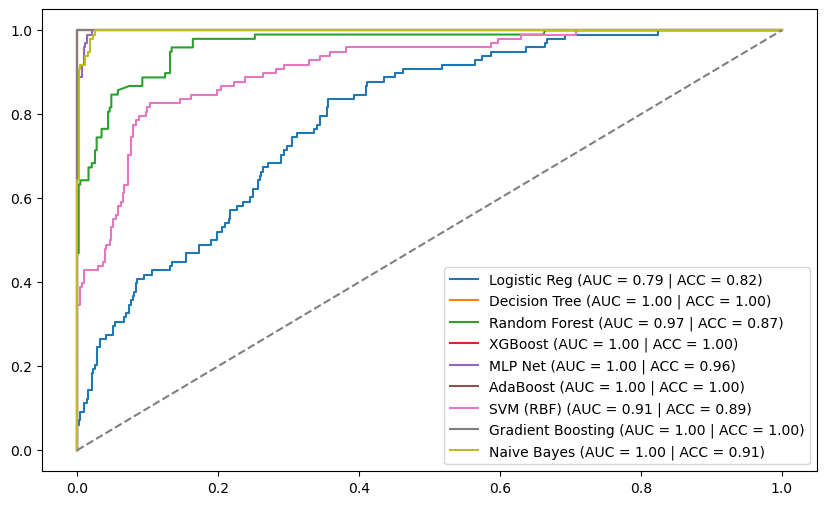

In [17]:

plt.figure(figsize=(10, 6))
for k in models:
    plt.plot(results[k]['FPR'], results[k]['TPR'], label=f'{k} (AUC = {results[k]["AUC"]:.2f} | ACC = {results[k]["Accuracy"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.legend()

In [18]:
confusion_matrices = {}

# Loop through results to extract confusion matrices
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    confusion_matrices[model_name] = {
        'True Negative': cm[0][0],
        'False Positive': cm[0][1],
        'False Negative': cm[1][0],
        'True Positive': cm[1][1],
    }

# Convert to a DataFrame for display
confusion_matrix_df = pd.DataFrame.from_dict(confusion_matrices, orient='index')
confusion_matrix_df

,True Negative,False Positive,False Negative,True Positive
Logistic Reg,432,0,98,0
Decision Tree,432,0,0,98
Random Forest,432,0,69,29
XGBoost,432,0,0,98
MLP Net,432,0,23,75
AdaBoost,432,0,0,98
SVM (RBF),399,33,25,73
Gradient Boosting,432,0,0,98
Naive Bayes,432,0,50,48


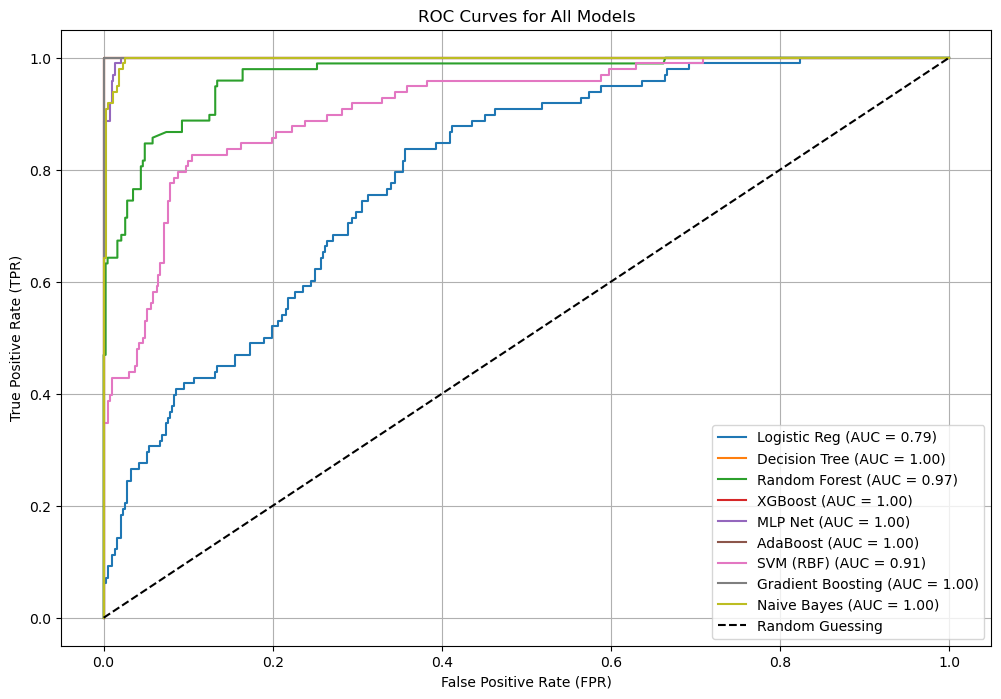

In [19]:
# Plot the ROC curves for each model
plt.figure(figsize=(12, 8))

# Loop through each model's results to plot ROC curves
for model_name, metrics in results.items():
    if metrics['FPR'] is not None and metrics['TPR'] is not None:  # Ensure ROC data exists
        plt.plot(metrics['FPR'], metrics['TPR'], label=f"{model_name} (AUC = {metrics['AUC']:.2f})")

# Add details to the plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Random guessing line
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

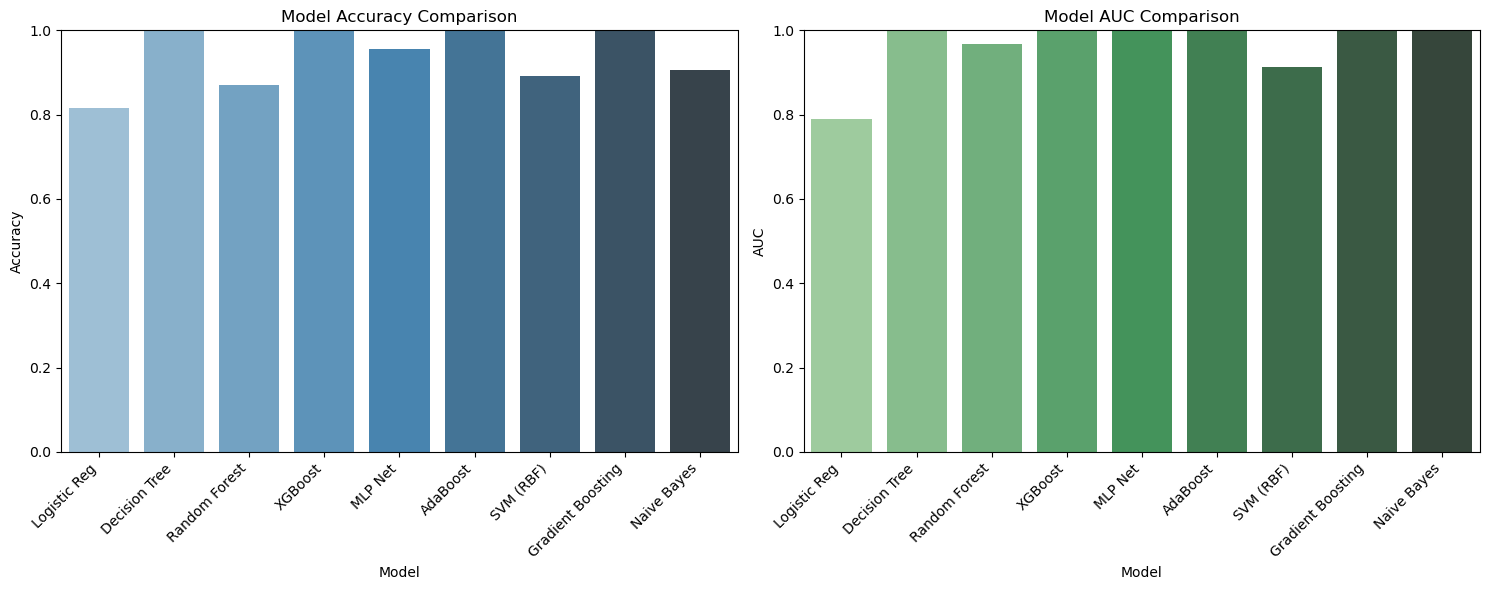

In [20]:
# Create a DataFrame for the performance metrics
performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [metrics['Accuracy'] for metrics in results.values()],
    'AUC': [metrics['AUC'] for metrics in results.values()]
})

# Plot the Accuracy and AUC side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy Bar Plot
sns.barplot(data=performance_df, x='Model', y='Accuracy', ax=axes[0], palette="Blues_d")
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylim(0, 1)

# AUC Bar Plot
sns.barplot(data=performance_df, x='Model', y='AUC', ax=axes[1], palette="Greens_d")
axes[1].set_title("Model AUC Comparison")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [21]:
features = [
    'ETH Vol.', 'Days from the last halving', 'Crypto Volatility Index',
    'GOLD Adjusted', 'OIL Price Adjusted', 'ETH Price', 'Low', 'High', 'Price', 
    'Open', 'Vol.', 'Change %', 'SN&P Adjusted', 'DXY Adjusted', 'BTC_Hashprice'
]
X = cleaned_bitcoin_data_no_nan[features]
y = cleaned_bitcoin_data_no_nan['Target Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
11,Change %,0.611585
10,Vol.,0.063394
0,ETH Vol.,0.037290
2,Crypto Volatility Index,0.031828
13,DXY Adjusted,0.029205
1,Days from the last halving,0.027928
9,Open,0.025334
6,Low,0.024478
12,SN&P Adjusted,0.023893
4,OIL Price Adjusted,0.022440


In [22]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False] 
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Use the best Random Forest estimator
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with Random Forest
y_pred_rf = best_rf_model.predict(X_test_scaled)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [24]:
# Ensure predictions are recomputed
y_pred_rf = rf_model.predict(scaler.transform(X_test))

# Evaluate the Random Forest model
print("Random Forest Model Evaluation:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Random Forest Model Evaluation:
[[454   0]
 [  3 205]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       454
           1       1.00      0.99      0.99       208

    accuracy                           1.00       662
   macro avg       1.00      0.99      0.99       662
weighted avg       1.00      1.00      1.00       662

Accuracy: 0.9954682779456193


In [25]:
auc = roc_auc_score(y_test, rf_model.predict_proba(scaler.transform(X_test))[:, 1])
print('AUC:', auc)

AUC: 0.9999152829549305


In [28]:
mcc = matthews_corrcoef(y_test, y_pred_rf)
print('Matthews Correlation Coefficient:', mcc)

Matthews Correlation Coefficient: 0.9894983843770202


In [30]:
logloss = log_loss(y_test, rf_model.predict_proba(scaler.transform(X_test)))
print('Log Loss:', logloss)

Log Loss: 0.11317885664595258


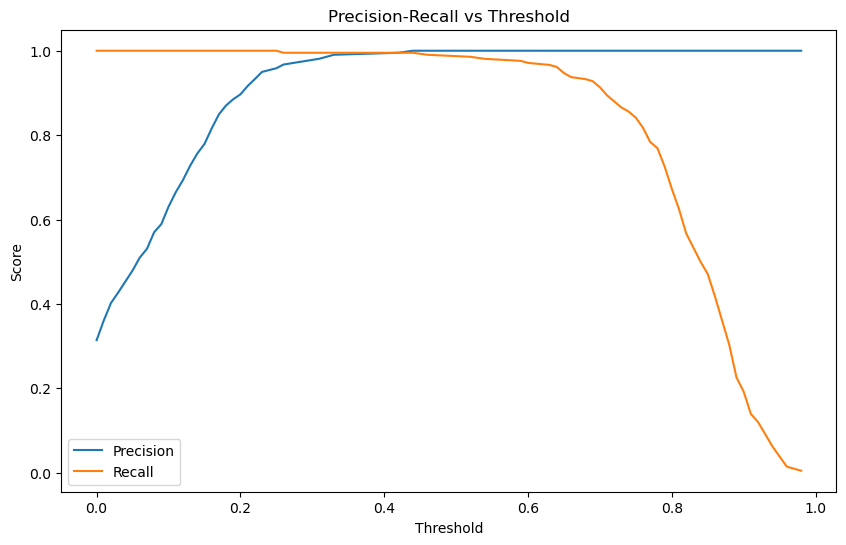

In [33]:
y_scores = rf_model.predict_proba(scaler.transform(X_test))[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

In [35]:
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

# Create a DataFrame for the metrics
error_metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 
               'Root Mean Squared Error (RMSE)', 'R-Squared (R2)'],
    'Value': [mae, mse, rmse, r2]
})

# Display the DataFrame
print(error_metrics_df)

                           Metric     Value
0       Mean Absolute Error (MAE)  0.004532
1        Mean Squared Error (MSE)  0.004532
2  Root Mean Squared Error (RMSE)  0.067318
3                  R-Squared (R2)  0.978969
